<a href="https://colab.research.google.com/github/BrandoSor4/Text-Mining/blob/main/Soriano_Brando_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

# Endpoint URL
url = "https://api.nhtsa.gov/complaints/complaintsByVehicle"

# Parameters for the API request
params = {
    "make": "acura",
    "model": "TLX",
    "modelYear": "2018"
}

# Making the GET request
response = requests.get(url, params=params)

# Checking if the request was successful
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("Error: " + str(response.status_code))

{'count': 43, 'message': 'Results returned successfully', 'results': [{'odiNumber': 11564526, 'manufacturer': 'Honda (American Honda Motor Co.)', 'crash': False, 'fire': False, 'numberOfInjuries': 0, 'numberOfDeaths': 0, 'dateOfIncident': '11/20/2023', 'dateComplaintFiled': '01/10/2024', 'vin': '19UUB3F38JA', 'components': 'POWER TRAIN,ENGINE', 'summary': 'there has been a recall out for my vehicle since november 9th or so and i took my car in around the 19th of november because my car started making a loud knocking noise and i initially knew that it was from the recall and so i took it in on the 20th to have it inspected and so when i took it to get inspected and diagnosed to see what was going on.. acura carland told me it from my rod bearing but there was no fix available at the time and so the noise was terrible and i asked if it’s ok to drive on and the service manager hector hernandez told me it was fine just keep up with the old change and see what happens in january which i did

In [ ]:

complaints = pd.DataFrame(data['results'])

In [ ]:
complaints

In [ ]:
#Clearly analyze rows and columns
complaints.head()

,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,summary,products
0,11564526,Honda (American Honda Motor Co.),False,False,0,0,11/20/2023,01/10/2024,19UUB3F38JA,"POWER TRAIN,ENGINE",there has been a recall out for my vehicle sin...,"[{'type': 'Vehicle', 'productYear': '2018', 'p..."
1,11563014,Honda (American Honda Motor Co.),False,False,0,0,08/01/2023,01/02/2024,19UUB2F56JA,"ENGINE,FUEL/PROPULSION SYSTEM",Car is red tagged on national recall site and ...,"[{'type': 'Vehicle', 'productYear': '2018', 'p..."
2,11562897,Honda (American Honda Motor Co.),False,False,0,0,12/25/2023,01/01/2024,19UUB2F66JA,"ENGINE,FUEL/PROPULSION SYSTEM,LANE DEPARTURE",Start up in the morning started to drive and t...,"[{'type': 'Vehicle', 'productYear': '2018', 'p..."
3,11561050,Honda (American Honda Motor Co.),False,False,0,0,12/06/2023,12/20/2023,19UUB2F54JA,ENGINE AND ENGINE COOLING,The contact owns a 2018 Acura TLX. The contact...,"[{'type': 'Vehicle', 'productYear': '2018', 'p..."
4,11559063,Honda (American Honda Motor Co.),False,False,0,0,12/07/2023,12/07/2023,19UUB3F38JA,"POWER TRAIN,STRUCTURE,ENGINE",i took my car to acura carland in duluth georg...,"[{'type': 'Vehicle', 'productYear': '2018', 'p..."


In [ ]:
print(complaints['components'].str.split(',\s+', expand=True).stack().value_counts()) #Sort and count the complaints into a common problems list

ENGINE                                                                  6
POWER TRAIN                                                             4
ELECTRICAL SYSTEM                                                       3
UNKNOWN OR OTHER                                                        3
FUEL/PROPULSION SYSTEM                                                  2
SERVICE BRAKES                                                          2
ENGINE,FUEL/PROPULSION SYSTEM                                           2
ELECTRICAL SYSTEM,ENGINE                                                2
ELECTRICAL SYSTEM,FUEL/PROPULSION SYSTEM,FORWARD COLLISION AVOIDANCE    1
SEAT BELTS                                                              1
STEERING,POWER TRAIN,ELECTRICAL SYSTEM,SERVICE BRAKES,ENGINE            1
SEAT BELTS,UNKNOWN OR OTHER,SERVICE BRAKES                              1
ELECTRICAL SYSTEM,ELECTRONIC STABILITY CONTROL                          1
SEATS                                 

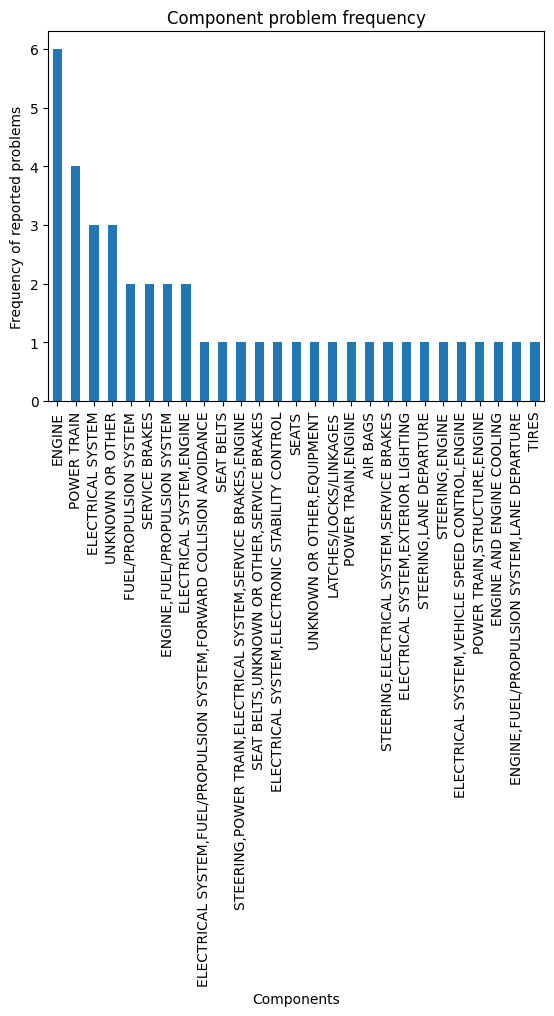

In [ ]:
import matplotlib.pyplot as plt

# Example Series
data = complaints['components'].str.split(',\s+', expand=True).stack().value_counts()

# Plotting the bar graph
data.plot(kind='bar')

plt.xlabel('Components')
plt.ylabel('Frequency of reported problems')
plt.title('Component problem frequency')
plt.show()
#Visualizing the complaints sent


## The vehicle Acura TLX 2018, experiences according to our data, most problematic complaints on engine, power train,and electrical system accordindly.